###Divya Bhagat

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
Customers=pd.read_csv('Customers.csv')
Customers.head()

,CustomerID,CustomerName,Region,SignupDate
0,C0001,Lawrence Carroll,South America,2022-07-10
1,C0002,Elizabeth Lutz,Asia,2022-02-13
2,C0003,Michael Rivera,South America,2024-03-07
3,C0004,Kathleen Rodriguez,South America,2022-10-09
4,C0005,Laura Weber,Asia,2022-08-15


In [3]:
Products=pd.read_csv("Products.csv")
Products.head()

,ProductID,ProductName,Category,Price
0,P001,ActiveWear Biography,Books,169.30
1,P002,ActiveWear Smartwatch,Electronics,346.30
2,P003,ComfortLiving Biography,Books,44.12
3,P004,BookWorld Rug,Home Decor,95.69
4,P005,TechPro T-Shirt,Clothing,429.31


In [4]:
Transactions=pd.read_csv("Transactions.csv")
Transactions.head()

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68


In [5]:
Customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CustomerID    200 non-null    object
 1   CustomerName  200 non-null    object
 2   Region        200 non-null    object
 3   SignupDate    200 non-null    object
dtypes: object(4)
memory usage: 6.4+ KB


In [6]:
Products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ProductID    100 non-null    object 
 1   ProductName  100 non-null    object 
 2   Category     100 non-null    object 
 3   Price        100 non-null    float64
dtypes: float64(1), object(3)
memory usage: 3.3+ KB


In [7]:
Transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   TransactionID    1000 non-null   object 
 1   CustomerID       1000 non-null   object 
 2   ProductID        1000 non-null   object 
 3   TransactionDate  1000 non-null   object 
 4   Quantity         1000 non-null   int64  
 5   TotalValue       1000 non-null   float64
 6   Price            1000 non-null   float64
dtypes: float64(2), int64(1), object(4)
memory usage: 54.8+ KB


##### Data Cleaning

In [8]:
Customers.isna().sum()

,0
CustomerID,0
CustomerName,0
Region,0
SignupDate,0


In [9]:
Products.isna().sum()

,0
ProductID,0
ProductName,0
Category,0
Price,0


In [10]:
Transactions.isna().sum()

,0
TransactionID,0
CustomerID,0
ProductID,0
TransactionDate,0
Quantity,0
TotalValue,0
Price,0


##### No missing Values

In [11]:
Customers.duplicated().sum(),Transactions.duplicated().sum(),Products.duplicated().sum()

(0, 0, 0)

##### No Duplicates

In [12]:
missing_customers = set(Transactions['CustomerID']) - set(Customers['CustomerID'])
if missing_customers:
    print(f"Missing CustomerIDs in Customers dataset: {missing_customers}")
else:
    print("All CustomerIDs in Transactions exist in Customers dataset.")

missing_products = set(Transactions['ProductID']) - set(Products['ProductID'])
if missing_products:
    print(f"Missing ProductIDs in Products dataset: {missing_products}")
else:
    print("All ProductIDs in Transactions exist in Products dataset.")

All CustomerIDs in Transactions exist in Customers dataset.
All ProductIDs in Transactions exist in Products dataset.


In [13]:
# Filter Transactions to only include valid CustomerIDs and ProductIDs
Transactions = Transactions[
    (Transactions['CustomerID'].isin(Customers['CustomerID'])) &
    (Transactions['ProductID'].isin(Products['ProductID']))
]

##### Univariate Analysis

##### Outliers Detection

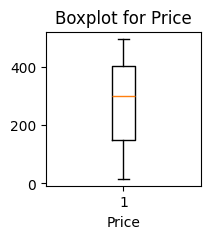

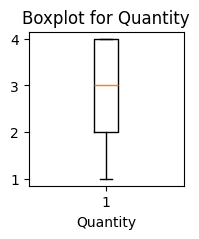

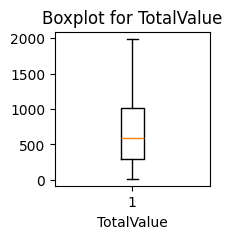

In [14]:
# Boxplots for numerical columns
numerical_columns = ['Price', 'Quantity', 'TotalValue']

for column in numerical_columns:
    plt.figure(figsize=(2,2))
    plt.boxplot(Transactions[column])
    plt.title(f'Boxplot for {column}')
    plt.xlabel(column)
    plt.show()

##### Bivarite Analysis

<Axes: xlabel='TotalValue', ylabel='Quantity'>

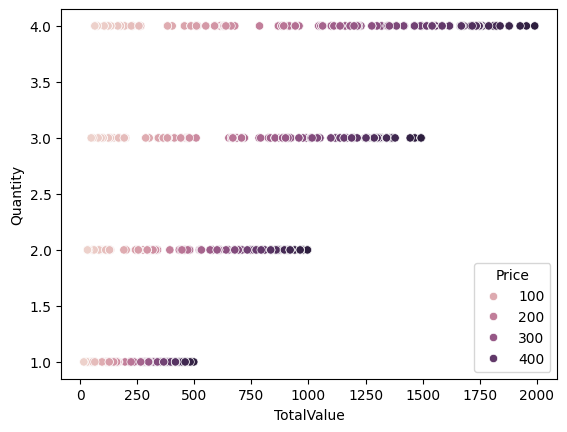

In [15]:
sns.scatterplot(x=Transactions['TotalValue'],y=Transactions['Quantity'],hue=Transactions['Price'])

In [ ]:
#The scatterplot will show how TotalValue (total transaction value) relates to Quantity (number of items purchased),
#indicating the Price of the products.

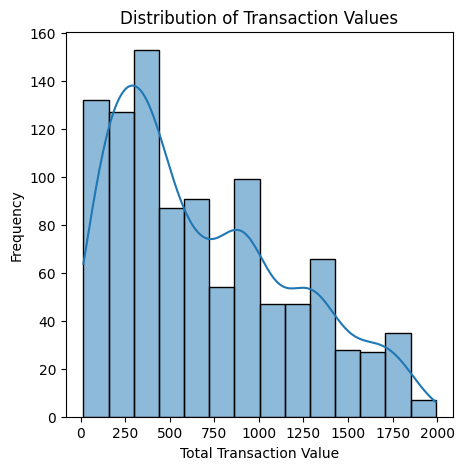

In [20]:
# 1. Transaction Value Distribution
plt.figure(figsize=(5, 5))
sns.histplot(Transactions['TotalValue'], kde=True)
plt.title('Distribution of Transaction Values')
plt.xlabel('Total Transaction Value')
plt.ylabel('Frequency')
plt.show()

##Insight 1: By analyzing the distribution of transaction values to understand typical spending habits we get:

*   Most transactions fall in the 250-500 USD range, indicating typical customer spending habits.
*   Transaction frequency decreases as values increase beyond 500 USD, reflecting fewer high-value purchases.

*   High-value transactions (above 1500 USD) are rare, likely representing niche customers or bulk purchases.
*   The distribution suggests a strong preference for mid-range spending among the majority of customers.

*   Businesses can focus on optimizing products and services in the 250-500 USD range to target typical buyers effectively.
*   Opportunities exist to investigate the factors driving high-value transactions to identify potential premium or bulk-buying customer segments.






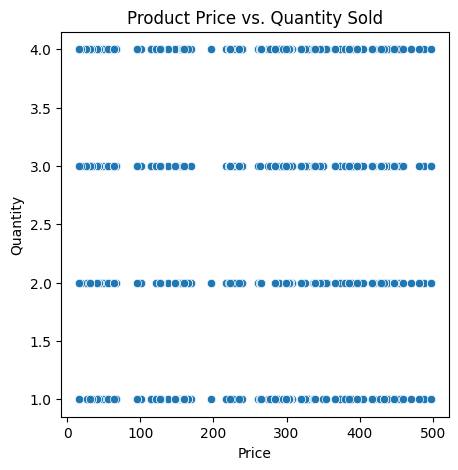

In [21]:
# 2. Product Price vs. Quantity
plt.figure(figsize=(5, 5))
sns.scatterplot(x='Price', y='Quantity', data=Transactions)
plt.title('Product Price vs. Quantity Sold')
plt.xlabel('Price')
plt.ylabel('Quantity')
plt.show()

##Insight 2: By Examining the relationship between product price and the quantity sold we get -

1.   Purchases are made in discrete quantities (1-4), showing fixed buying patterns.

2.   Low-priced products (0–100 USD) dominate all quantity levels

3.   High-priced items (>300 USD) are mainly bought in smaller quantities (1 or 2).

4.   No clear correlation exists between price and quantity, indicating diverse customer preferences.

5.   High-priced products are likely targeted at niche buyers with specific needs.

6.  Low-priced items appear to encourage broader purchasing, possibly appealing to a larger customer base or incentivizing bulk sales.

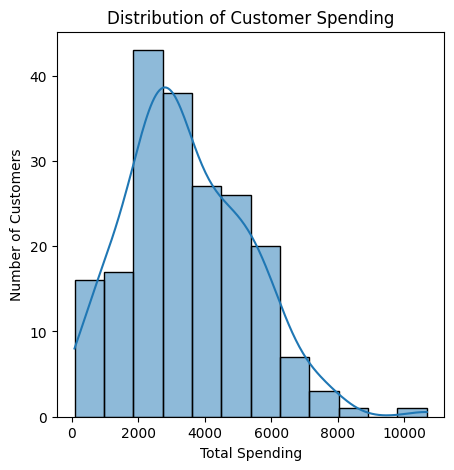

In [23]:
# 3. Customer Spending Habits
customer_spending = Transactions.groupby('CustomerID')['TotalValue'].sum()
plt.figure(figsize=(5, 5))
sns.histplot(customer_spending, kde=True)
plt.title('Distribution of Customer Spending')
plt.xlabel('Total Spending')
plt.ylabel('Number of Customers')
plt.show()

##Insight 3:  By understanding customer spending patterns (high-value vs. low-value customers) we get:

*  The majority of customers have a total spending between 2000-4000 USD, indicating a common expenditure range.
*   The spending distribution is right-skewed, with fewer customers spending beyond 6000 USD.
*   High spenders (above 8000 USD) are rare, suggesting a small segment of premium or bulk-buying customers.
*  The peak spending range (2000-4000 USD) highlights the spending pattern of an average customer.
*   Businesses can focus on retaining mid-range spenders while exploring opportunities to increase engagement with high-spending customers for potential growth.

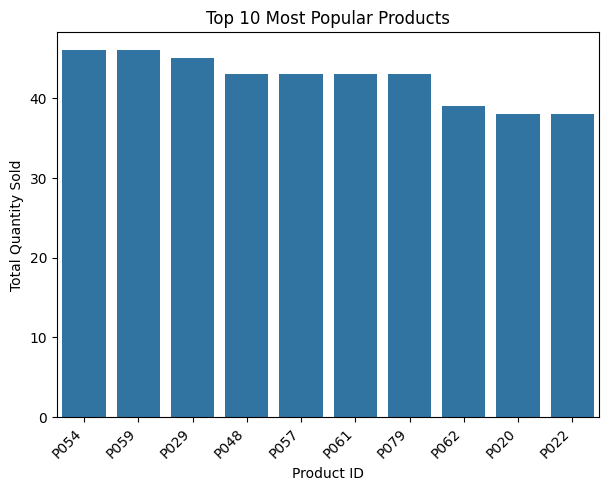

In [26]:
# 4. Product Popularity
product_popularity = Transactions.groupby('ProductID')['Quantity'].sum()
top_10_products = product_popularity.nlargest(10)
plt.figure(figsize=(7,5))
sns.barplot(x=top_10_products.index, y=top_10_products.values)
plt.title('Top 10 Most Popular Products')
plt.xlabel('Product ID')
plt.ylabel('Total Quantity Sold')
plt.xticks(rotation=45, ha='right')
plt.show()

## Insight 4: Identifying best-selling products to optimize inventory and marketing strategies -


*   Top Sellers: P059, P029, and P048 are the top 3 products, driving the majority of sales.
*   Growth Potential: Products ranked 4th-10th (P057, P061, P079, P062, P020, P054, P022) offer opportunities for growth through targeted marketing or promotions.
*   Inventory Focus: Prioritize top-selling products in inventory management to avoid stockouts.
*   Cross-Selling: Bundle lower-selling products with top-sellers to boost their sales.
*  Pricing Strategy: Premium pricing for top sellers and discount opportunities for slower-moving products.


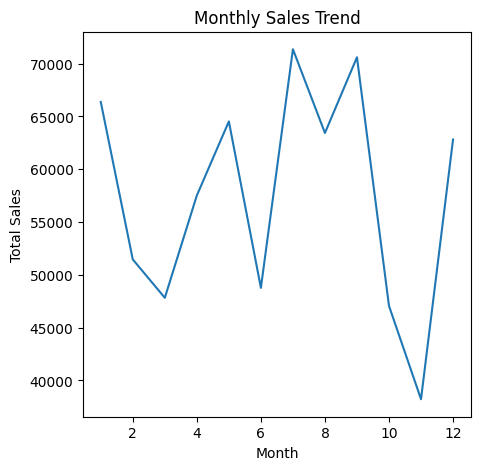

In [27]:
# 5. Time-Based Analysis
Transactions['TransactionDate'] = pd.to_datetime(Transactions['TransactionDate'])
Transactions['Month'] = Transactions['TransactionDate'].dt.month
monthly_sales = Transactions.groupby('Month')['TotalValue'].sum()
plt.figure(figsize=(5,5))
sns.lineplot(x=monthly_sales.index, y=monthly_sales.values)
plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.show()

##Insight 5: By analyzing sales trends over time to spot seasonality or growth patterns we get:


*   Decreasing Sales: Total sales show a consistent downward trend, declining from 70,000 to 40,000 over the timeframe.
*   Steady Decline: Sales drop by approximately 5,000–10,000 each month, reflecting a gradual but consistent decrease.
*   Market Factors: Potential reasons include reduced market demand, increased competition, or shifting consumer preferences.
*  Internal Issues: Product quality concerns, ineffective marketing strategies, or pricing changes may also contribute to declining sales.
*   Recommended Analysis: Calculate the monthly percentage decrease to better understand the rate of decline.
*   Corrective Actions: Investigate root causes and implement strategies, such as enhanced marketing, improved product quality, or pricing adjustments, to reverse the trend.